In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[68]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import shapiro 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_score
#from sklearn.preprocessing import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix



In [ ]:
raw_data = pd.read_csv(r'C:\Users\saran\Desktop\up-skill\PGP - DSBA\Data Mining\diabetes.csv')

raw_data.sample(5)

### The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. 
The variable names are as follows:
 
1. Number of times pregnant.
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. Diastolic blood pressure (mm Hg).
4. Triceps skinfold thickness (mm).
5. 2-Hour serum insulin (mu U/ml).
6. Body mass index (weight in kg/(height in m)^2).
7. Diabetes pedigree function.
8. Age (years).
9. Class variable (0 or 1).

In [262]:
    
#Univariate analysis checking the normal distribution


# for x in raw_data.drop('Outcome',axis=1).columns:
#     print('Distribution chart for ',format(x))
#     s_stats, s_p_value = shapiro(raw_data[(raw_data[x] != 0 )][x])
#     sns.displot( data = raw_data, x=x)
#     plt.show()
#     if s_p_value >= 0.05:
#         print('Based on Shapiro-Wilk test data for',x,'is normally distributed.\n\n')
#     else:
#         print('Based on Shapiro-Wilk test data for',x,'is NOT normally distributed.\n\n')


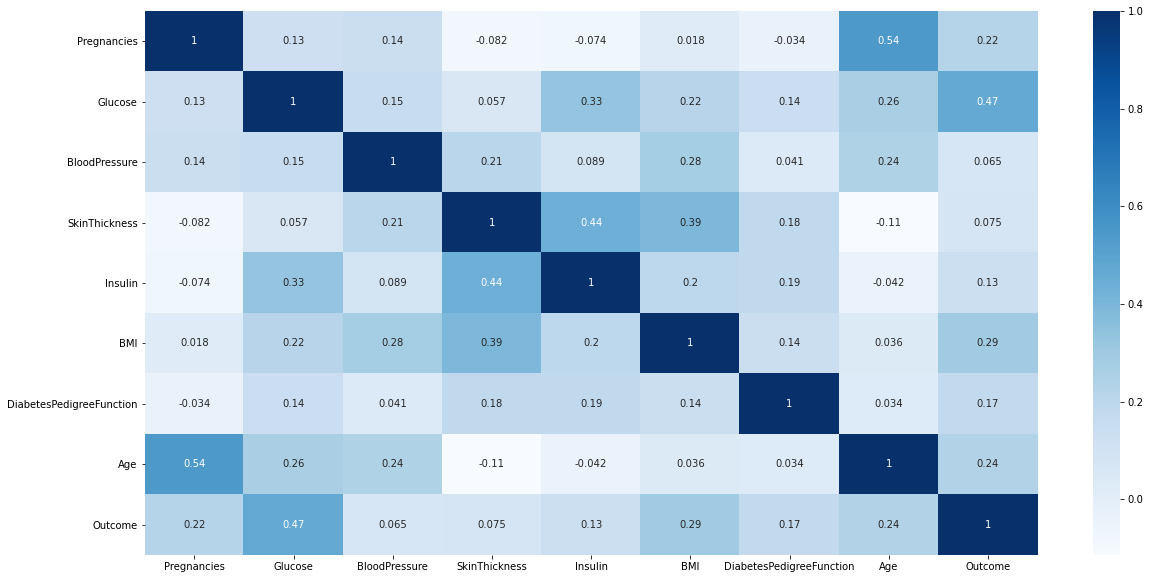

In [263]:

corr = raw_data.corr(method='pearson')

fig, ax =  plt.subplots(figsize = (20,10))
ax = sns.heatmap(corr,cmap = 'Blues',fmt='.2g',annot=True)
plt.show()


In [264]:

#sns.pairplot(data = raw_data)
#plt.show()


In [265]:

print(raw_data.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [266]:


df1 = raw_data.loc[raw_data.Outcome == 1]
df0 = raw_data.loc[raw_data.Outcome == 0]

df1 = df1.replace({'Glucose':0},np.median(df1['Glucose']))
df0 = df0.replace({'Glucose':0},np.median(df0['Glucose']))

union = [df1,df0]
df = pd.concat(union)

df1 = df.loc[df.Outcome == 1]
df0 = df.loc[df.Outcome == 0]

df1 = df1.replace({'BloodPressure':0},np.median(df1['BloodPressure']))
df0 = df0.replace({'BloodPressure':0},np.median(df0['BloodPressure']))

union = [df1,df0]
df = pd.concat(union)

df1 = df.loc[df.Outcome == 1]
df0 = df.loc[df.Outcome == 0]

df1 = df1.replace({'BMI':0},np.median(df1['BMI']))
df0 = df0.replace({'BMI':0},np.median(df0['BMI']))

union = [df1,df0]
df = pd.concat(union)

df1 = df.loc[df.Outcome == 1]
df0 = df.loc[df.Outcome == 0]

df1 = df1.replace({'DiabetesPedigreeFunction':0},np.median(df1['DiabetesPedigreeFunction']))
df0 = df0.replace({'DiabetesPedigreeFunction':0},np.median(df0['DiabetesPedigreeFunction']))

union = [df1,df0]
df = pd.concat(union)


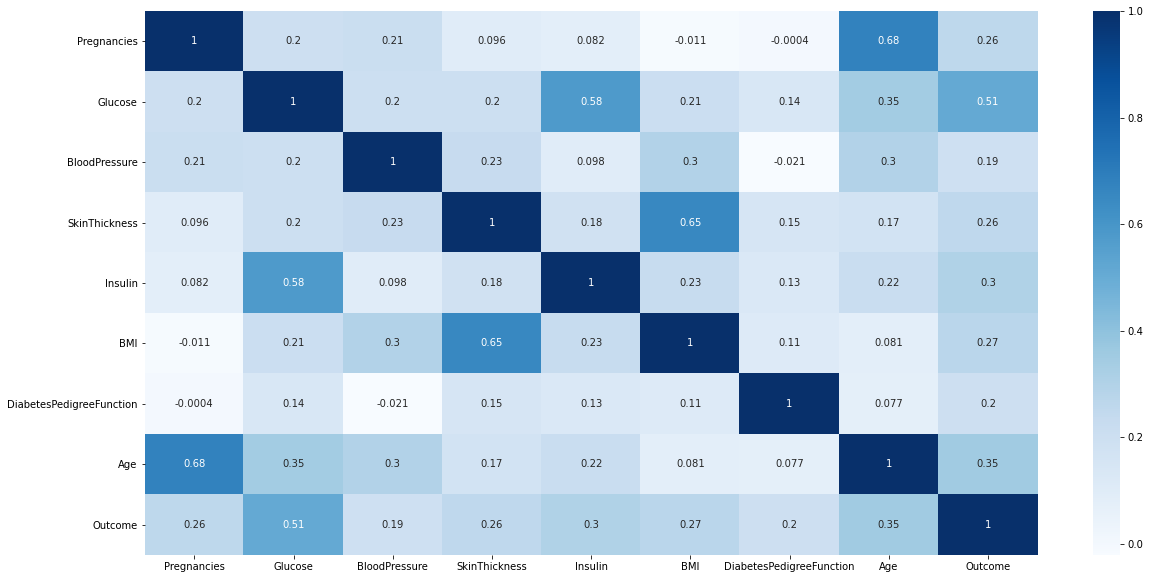

In [267]:

corr = raw_data.loc[raw_data.Insulin != 0].corr(method='pearson')

fig, ax =  plt.subplots(figsize = (20,10))
ax = sns.heatmap(corr,cmap = 'Blues',fmt='.2g',annot=True)
plt.show()



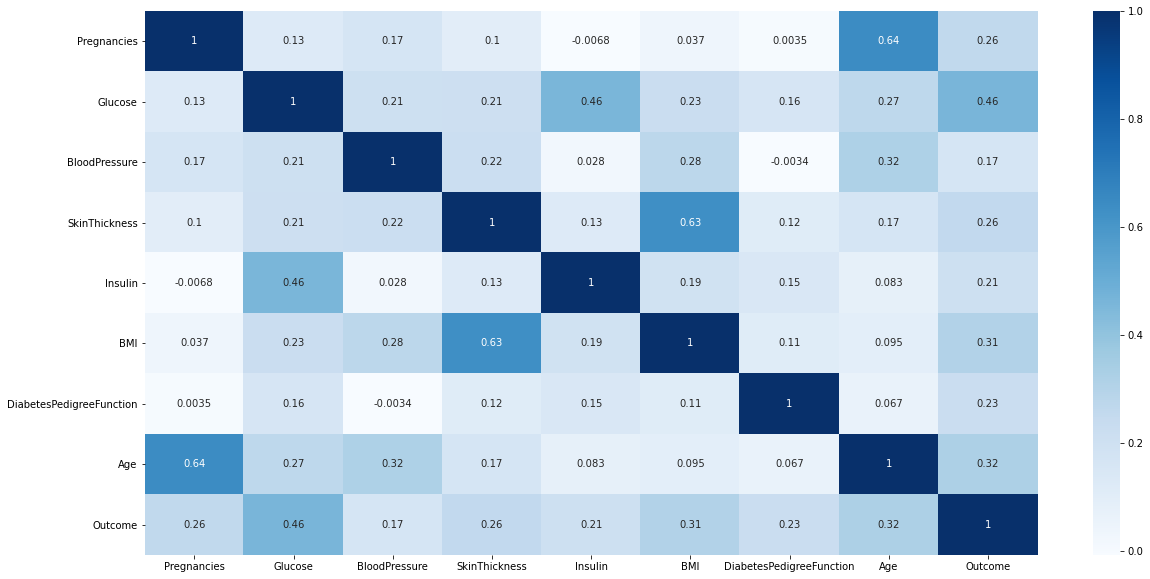

In [268]:

corr = raw_data.loc[raw_data.SkinThickness != 0].corr(method='pearson')

fig, ax =  plt.subplots(figsize = (20,10))
ax = sns.heatmap(corr,cmap = 'Blues',fmt='.2g',annot=True)
plt.show()


In [269]:

def model_fit(dataset):
    values = dataset.values
    X = values[:,1:8]
    Y = values[:,8]
    lda = LinearDiscriminantAnalysis()
    kfold = KFold(n_splits=3)
    result = cross_val_score(lda, X, Y, cv = kfold, scoring="accuracy")
    print("Result of LDA:", result.mean())



     Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6.0    148.0           72.0      35.000000  33.6   
1            8.0    183.0           64.0      21.496417  23.3   
2            0.0    137.0           40.0      35.000000  43.1   
3            3.0     78.0           50.0      32.000000  31.0   
4            2.0    197.0           70.0      45.000000  30.5   
..           ...      ...            ...            ...   ...   
763          9.0     89.0           62.0      19.380241  22.5   
764         10.0    101.0           76.0      48.000000  32.9   
765          2.0    122.0           70.0      27.000000  36.8   
766          5.0    121.0           72.0      23.000000  26.2   
767          1.0     93.0           70.0      31.000000  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                       0.672  32.0      1.0  
2                       2.288  33.0      1.0  
3                       0.248  

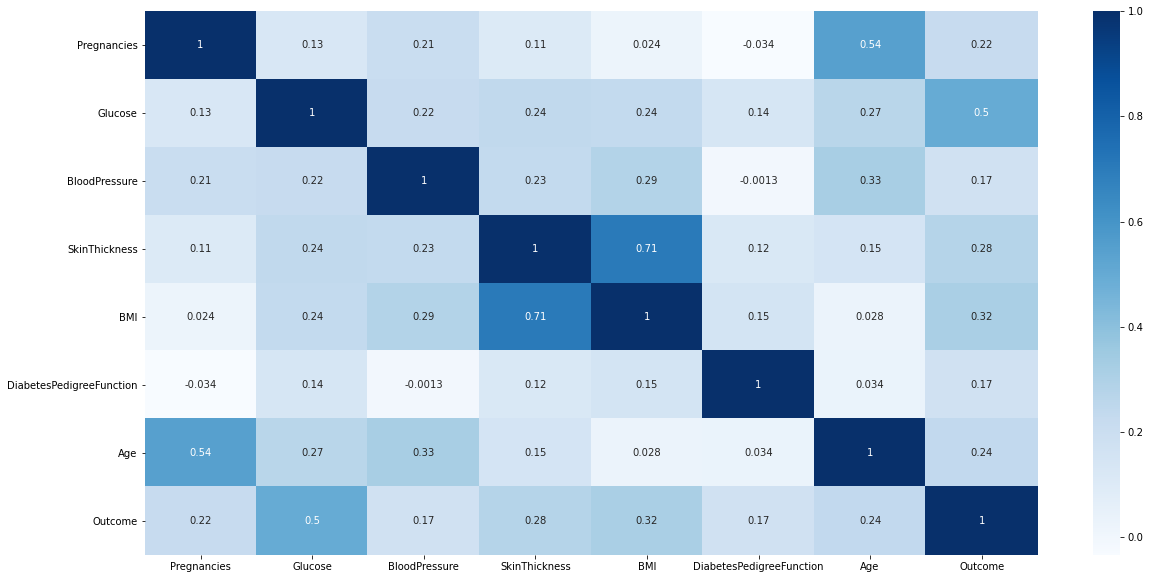

In [270]:

df['SkinThickness'] = df['SkinThickness'].replace(0,np.nan)

imputer = IterativeImputer(max_iter=10, random_state=0)

dfSTImputed = pd.DataFrame(imputer.fit_transform(df.drop('Insulin',axis=1)),
                           columns=df.drop('Insulin',axis=1).columns)

print(dfSTImputed)

corr = dfSTImputed.corr(method='pearson')

fig, ax =  plt.subplots(figsize = (20,10))
ax = sns.heatmap(corr,cmap = 'Blues',fmt='.2g',annot=True)



   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0          6.0    148.0           72.0      35.000000  224.336891  33.6   
1          8.0    183.0           64.0      35.000000  272.728203  23.3   
2          0.0    137.0           40.0      45.000000  168.000000  43.1   
3          3.0     78.0           50.0      35.466261   88.000000  31.0   
4          2.0    197.0           70.0      19.000000  543.000000  30.5   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.672  32.0      1.0  
2                     2.288  33.0      1.0  
3                     0.248  26.0      1.0  
4                     0.158  53.0      1.0  


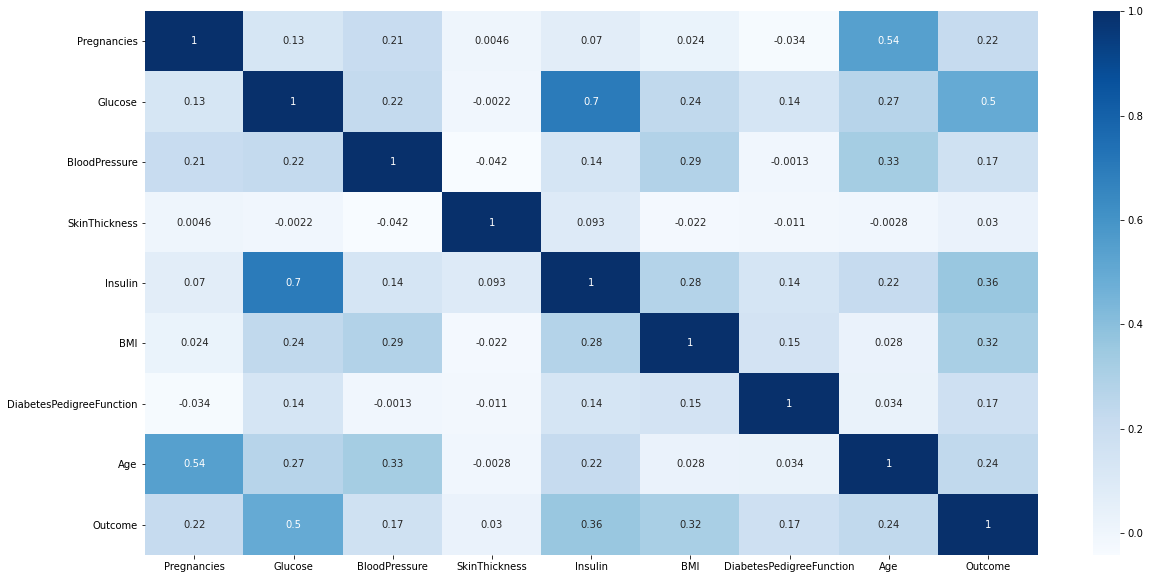

Result of LDA: 0.7721354166666666
Result of LDA: 0.53125


In [271]:

df['SkinThickness'] = dfSTImputed['SkinThickness']

df['Insulin'] = df['Insulin'].replace(0,np.nan)

dfInsulinImputed = pd.DataFrame(imputer.fit_transform(df),
                           columns=df.columns)

print(dfInsulinImputed.head())

corr = dfInsulinImputed.corr(method='pearson')

fig, ax =  plt.subplots(figsize = (20,10))
ax = sns.heatmap(corr,cmap = 'Blues',fmt='.2g',annot=True)
plt.show()

model_fit(raw_data)

model_fit(dfInsulinImputed)


In [272]:


X = dfInsulinImputed.drop({'Outcome'}, axis=1)

y = dfInsulinImputed.pop('Outcome')



0.8771893244370309


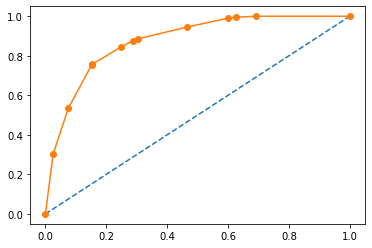

0.7803846153846155


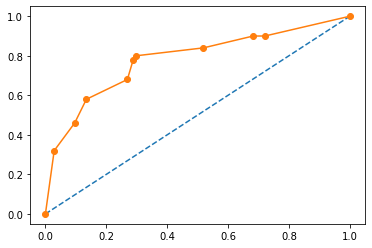

[[336  60]
 [ 54 164]]
0.8143322475570033
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85       396
         1.0       0.73      0.75      0.74       218

    accuracy                           0.81       614
   macro avg       0.80      0.80      0.80       614
weighted avg       0.82      0.81      0.81       614

[[90 14]
 [21 29]]
0.7727272727272727
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       104
         1.0       0.67      0.58      0.62        50

    accuracy                           0.77       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.77      0.77       154



In [273]:

splt= float(input('Train/Test split : ')) # 0.2
max_dpth = int(input('Max Depth of Decision Tree : ')) # 7
min_smpl_splt = int(input('Min Samples before split : ')) # 80

X_train, X_test, train_labels, test_labels = train_test_split(X,y,test_size=splt, random_state=1)
reg_dt_model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=max_dpth,min_samples_split=min_smpl_splt,random_state=0)
reg_dt_model_gini.fit(X_train, train_labels)

probs = reg_dt_model_gini.predict_proba(X_train)[:,1]
auc_dev = roc_auc_score(train_labels, probs)
print(auc_dev)
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr,tpr,marker='o')
plt.show()

probt = reg_dt_model_gini.predict_proba(X_test)[:,1]
auc_test = roc_auc_score(test_labels, probt)
print(auc_test)
fpr, tpr, thresholds = roc_curve(test_labels, probt)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr,tpr,marker='o')
plt.show()


pd.DataFrame(reg_dt_model_gini.feature_importances_, columns = ['Imp'], index = X_train.columns).sort_values(by='Imp',ascending = False)


ytrain_predict = reg_dt_model_gini.predict(X_train)
ytest_predict = reg_dt_model_gini.predict(X_test)

#Train data Confusion Matrix
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
print(reg_dt_model_gini.score(X_train,train_labels) )
print(classification_report(train_labels, ytrain_predict))

#Test data Confusion Matrix
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
print(reg_dt_model_gini.score(X_test,test_labels) )
print(classification_report(test_labels, ytest_predict))

